In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift
import cv2

from PIL import Image

def show_img(title, img1, label1, img2, label2):

    figure = plt.figure()
    figure.suptitle(title)
    # show the first image
    figure.add_subplot(1, 2, 1)
    plt.imshow(img1)
    plt.title(label1)
    # show the second image
    figure.add_subplot(1, 2, 2)
    plt.imshow(img2)
    plt.title(label2)
    plt.show()

def mean_shift(img):
    # Step 1 
    color_mat = np.array(img)
    red, green, blue = cv2.split(color_mat)
    
    # Step 2 
    colour = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])
   
    # Step 3 
    res = MeanShift(bin_seeding=True)
    mean_res = res.fit_predict(colour).reshape(red.shape)

    return mean_res

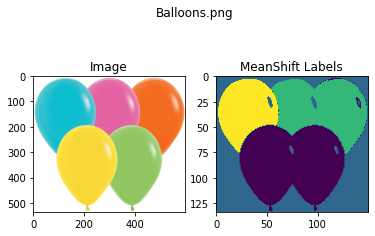

In [3]:
#Task1 - mean-shift
def mean_s_out(img_path):
    
    # Read image
    img = Image.open(img_path)
    img.thumbnail((150,150))

    ms_res =  mean_shift(img) 

    img = mpimg.imread(img_path)
    show_img(img_path, img, "Image",  ms_res, "MeanShift Labels")
mean_s_out('Balloons.png')

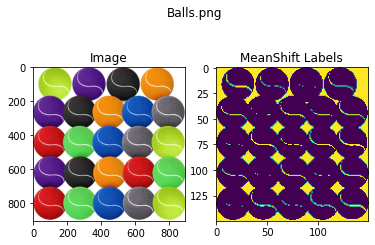

In [4]:
mean_s_out('Balls.png')

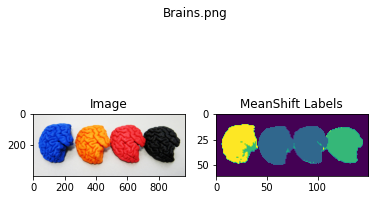

In [28]:
mean_s_out('Brains.png')

In [5]:
#Task2 - water_shed
def water_shed(img):
    # Step 1
    img = np.array(img)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, img_tresh = cv2.threshold(img_gray,203, 238, cv2.THRESH_BINARY)
    img_array = img_tresh
    
    # Step 2
    distance = ndi.distance_transform_edt(img_array)
   
    # Step 3 
    local_max = peak_local_max(distance, footprint=np.ones((3,3)), labels=img_array)
    m = np.zeros(distance.shape)
    m[tuple(local_max.T)] = True
    markers = ndi.label(m)[0]
    
    # Step 4 
    ws_labels = watershed(-distance, markers, mask=img_array)
    return ws_labels

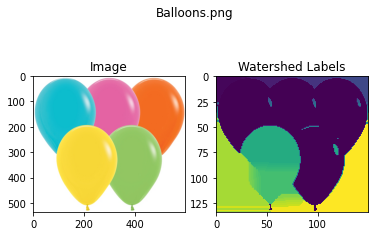

In [6]:
def water_s_out(img_path):
 
    img = Image.open(img_path)
    img.thumbnail((150,150))
    ws_labels = water_shed(img)

    img = mpimg.imread(img_path)

    show_img(img_path, img, "Image", ws_labels, "Watershed Labels")
water_s_out('Balloons.png') 

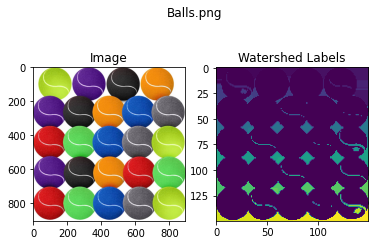

In [7]:
water_s_out('Balls.png')

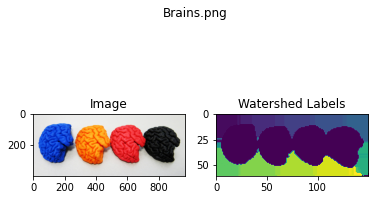

In [50]:
water_s_out('Brains.png')

In [10]:
#Task3
img1 = Image.open('Balloons.png')
img1 .thumbnail((150,100))
img2 = Image.open('Balls.png')
img2 .thumbnail((150,100))
img3 = Image.open('Brains.png')
img3 .thumbnail((150,100))


ms_res1_mean = mean_shift(img1) 
ms_res1_water = water_shed(img1) 
num_u_mean1,n = np.unique(ms_res1_mean, return_counts = True)
num_u_water1,n = np.unique(ms_res1_water, return_counts = True)


ms_res2_mean = mean_shift(img2) 
ms_res2_water = water_shed(img2) 
num_u_mean2,m = np.unique(ms_res2_mean, return_counts = True)
num_u_water2,m = np.unique(ms_res2_water, return_counts = True)

ms_res3_mean = mean_shift(img3) 
ms_res3_water = water_shed(img3) 
num_u_mean3,i = np.unique(ms_res3_mean, return_counts = True)
num_u_water3,i = np.unique(ms_res3_water, return_counts = True)


img_list = ['Balloons',' Balls', 'Brains']
img_list2 = [[num_u_mean1,num_u_water1],[num_u_mean2,num_u_water2],[num_u_mean3,num_u_water3]]
print('Image          #Objects MeanShift         #Objects Watershed')
print()
index = 0
for i in img_list:
    i = i.ljust(8)
    print(f'{i}              {len(img_list2[index][0])}                         {len(img_list2[index][1])}')
    index +=1

Image          #Objects MeanShift         #Objects Watershed

Balloons              4                         42
 Balls                2                         125
Brains                4                         33


From the result, we can see that the number of objects of img applied by watershed is larger than which applied by mean shift. Therefore,I think watershed is better than mean shift because watershed has better response to weak edges, which is the guarantee of generating closed continuous edges and components. 